In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('datasets/play_football.csv', sep = ",")

label = LabelEncoder()
dataset = dataset.apply(label.fit_transform)

dataset.columns = pd.read_csv('datasets/play_football.csv', sep = ",").columns

X = dataset.drop('Play', axis = 1)
Y = dataset['Play']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 111)

tree = DecisionTreeClassifier()

tree.fit(X_train, Y_train)
tree.score(X_test, Y_test)

0.90000000000000002

In [2]:
tree.n_classes_

2

In [3]:
tree.feature_importances_

array([ 0.3985447 ,  0.135572  ,  0.24053734,  0.22534596])

In [4]:
tree.max_features_

4

In [5]:
tree.tree_

In [6]:
# Uso l'entropia per misurare la qualità dello split
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, Y_train)
tree.score(X_test, Y_test)

0.90000000000000002

In [7]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

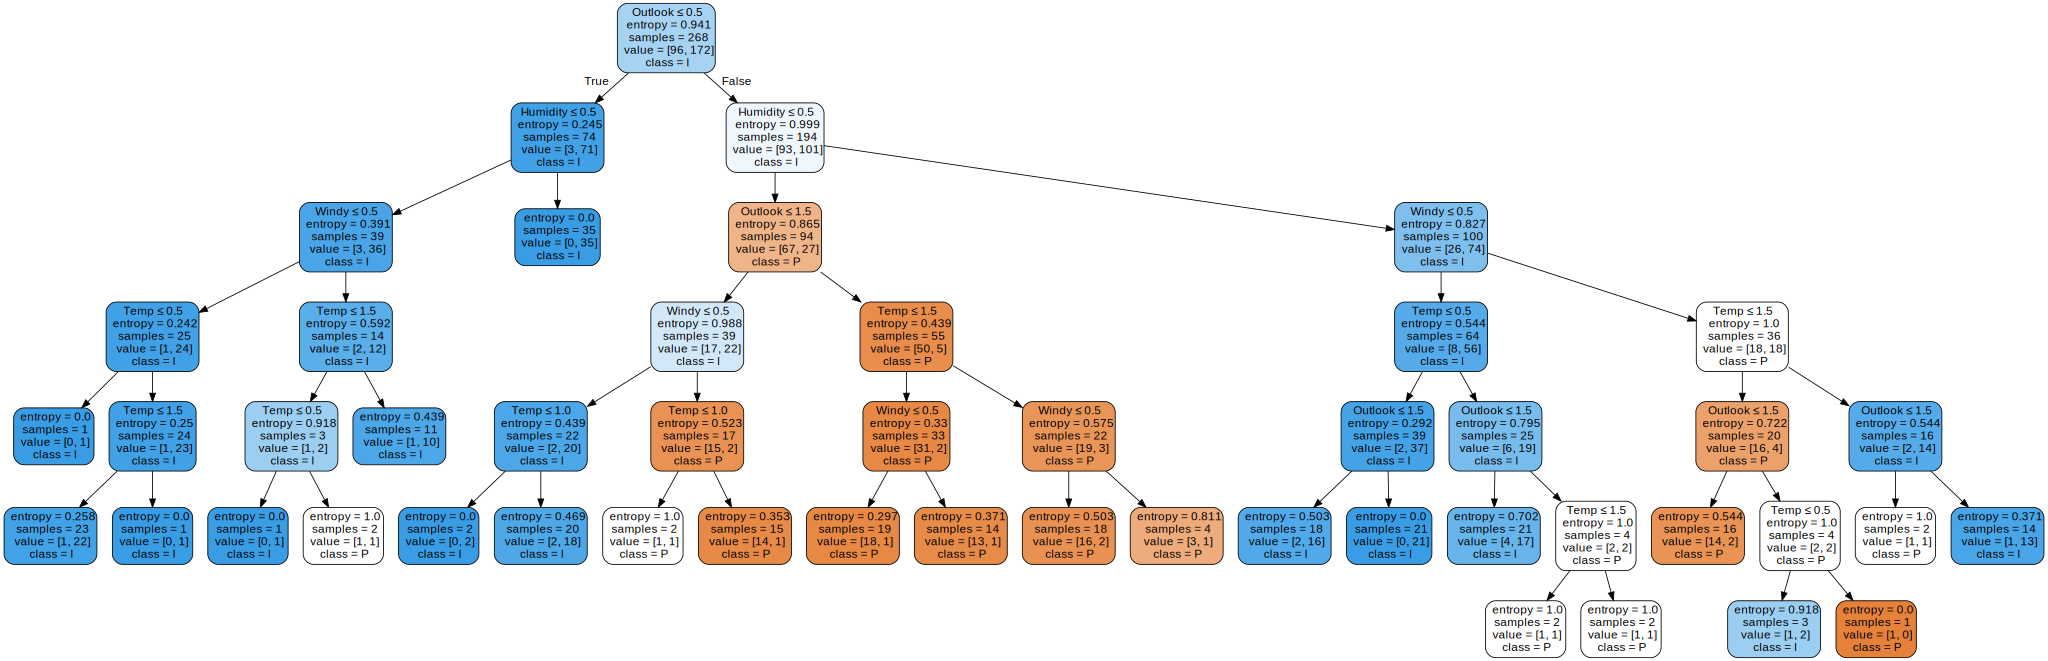

In [8]:
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names = X.columns,  
                         class_names = Y.name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 